In [342]:
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

## Linear Regression

In [369]:
X_1 = 2 + np.random.rand(100,1)
X_2 = np.random.rand(100,1)
y = X_1 + X_2-3 + np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)), X_1, X_2]

theta = np.random.rand(3,1)

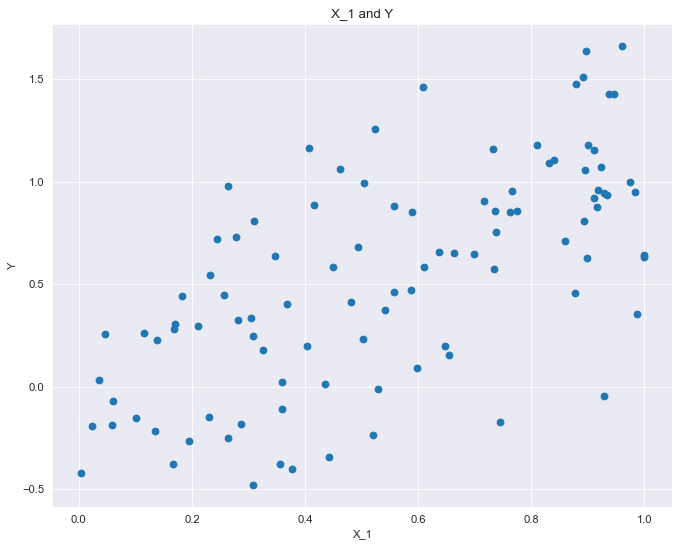

In [370]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('X_1 and Y')
plt.xlabel('X_1')
plt.ylabel('Y')
plt.scatter(X_2, y)
plt.show()

## Derivitave of the Cost Function

Take the partial derivative of the cost function with respect to each parameter to update theta. 

Theta_next = Theta - learning*rate*partial_derivitive_MSE(theta)

Define MSE and R2 for tracking. Check against sklearn function to confirm correct. 

In [371]:
mean_squared_error(X_b.dot(theta), y)

4.411409779221972

In [372]:
sum((X_b.dot(theta)-y)**2)/m

array([4.41140978])

In [373]:
r2_score(y, X_b.dot(theta))

-14.688297363854709

In [374]:
R2 = (sum((y.mean()-y)**2)-sum((X_b.dot(theta)-y)**2)) / sum((y.mean()-y)**2)
R2

array([-14.68829736])

In [375]:
iterations = 1000
eta = .1
m = len(X_b)

mse_track = []
track_theta = []
r2_track = []

for iterations in range(iterations):
    mse_track.append(float(sum((X_b.dot(theta)-y)**2)/m))
    r2_track.append((sum((y.mean()-y)**2)-sum((X_b.dot(theta)-y)**2)) / sum((y.mean()-y)**2))
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - gradients * eta
    track_theta.append(theta)

In [376]:
theta

array([[-2.09392852],
       [ 0.83104939],
       [ 1.04002614]])

In [377]:
min(mse_track)

0.0912008752423813

In [378]:
theta1 = []
theta2 = []
theta3 = []
for t in track_theta:
    theta1.append(float(t[0]))
    theta2.append(float(t[1]))
    theta3.append(float(t[2]))

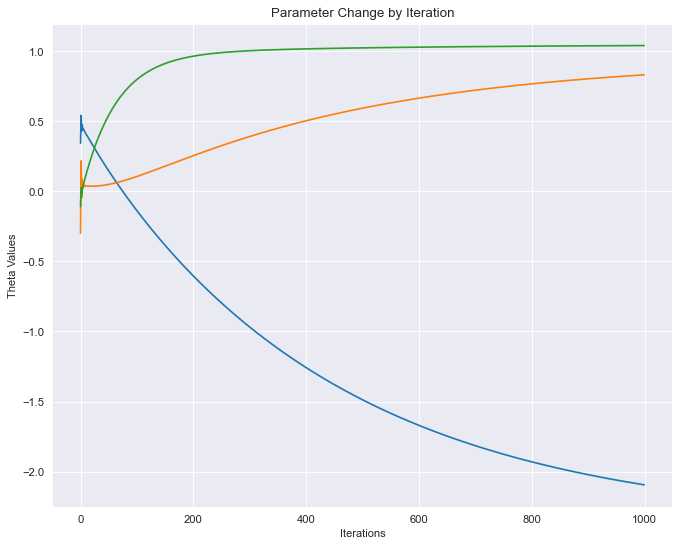

In [379]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Parameter Change by Iteration')
plt.xlabel('Iterations')
plt.ylabel('Theta Values')
plt.plot(theta1)
plt.plot(theta2)
plt.plot(theta3)
plt.show()

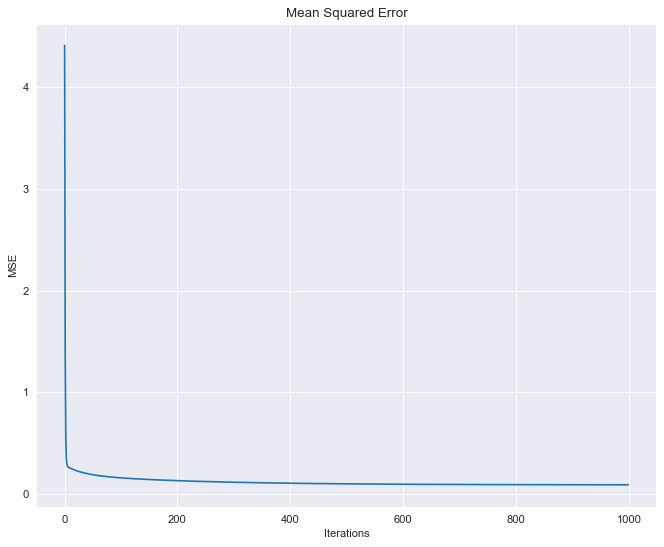

In [380]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Mean Squared Error')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.plot(mse_track)
plt.show()

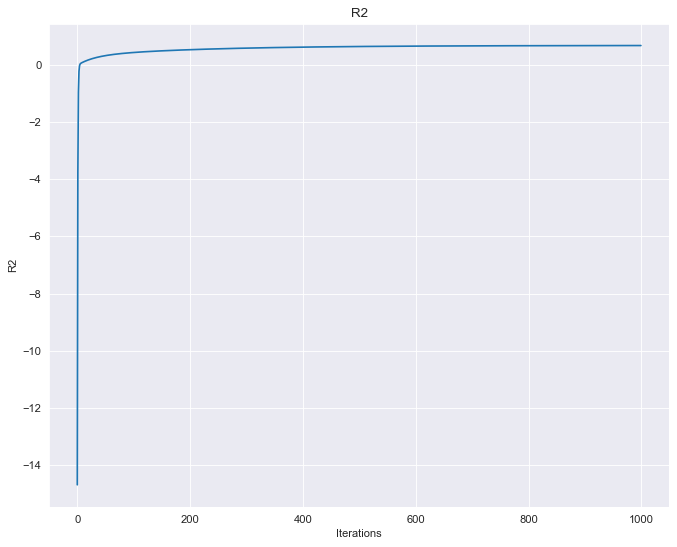

In [381]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('R2')
plt.xlabel('Iterations')
plt.ylabel('R2')
plt.plot(r2_track)
plt.show()

In [382]:
r2_track

[array([-14.68829736]),
 array([-3.78441094]),
 array([-0.96473625]),
 array([-0.22936635]),
 array([-0.0315586]),
 array([0.02743438]),
 array([0.05041447]),
 array([0.06389057]),
 array([0.07470355]),
 array([0.08462379]),
 array([0.09411426]),
 array([0.10330073]),
 array([0.1122218]),
 array([0.12089338]),
 array([0.12932537]),
 array([0.13752593]),
 array([0.14550255]),
 array([0.15326242]),
 array([0.16081245]),
 array([0.16815932]),
 array([0.17530948]),
 array([0.1822692]),
 array([0.18904452]),
 array([0.19564128]),
 array([0.20206514]),
 array([0.20832158]),
 array([0.21441589]),
 array([0.2203532]),
 array([0.22613845]),
 array([0.23177643]),
 array([0.2372718]),
 array([0.24262902]),
 array([0.24785244]),
 array([0.25294626]),
 array([0.25791453]),
 array([0.26276119]),
 array([0.26749004]),
 array([0.27210475]),
 array([0.27660887]),
 array([0.28100586]),
 array([0.28529903]),
 array([0.28949162]),
 array([0.29358672]),
 array([0.29758737]),
 array([0.30149647]),
 array([0

## Logistic Regression

In [1586]:
from sklearn.metrics import log_loss
import math
import numpy as np

In [2261]:
y = np.array([1,1,1,0,0,0])
y = y.reshape(6,1)
y_pred = np.array([.8, .6, .45, .51, .3, .1])
X_1 = np.array([2, 2.3, 2.7, 2.5, 2.8, 2.9])
X_1 = X_1.reshape(6,1)
X_b = np.c_[np.ones((6,1)), X_1]

In [2198]:
log_loss(y, y_pred)

0.4513103697953326

In [2199]:
def log_loss_custom(y, y_pred):
    assert len(y) == len(y_pred)
    m = len(y)
    log_loss = -sum((y*np.log(y_pred))+((1-y)*np.log(1-y_pred)))/m
    return log_loss

In [2200]:
log_loss_custom(y, y_pred)

array([0.91629073, 0.71355818, 0.69817235, 0.69334722, 0.78032387,
       1.2039728 ])

In [2201]:
def sigmoid(t):
    r = 1/(1+np.exp(-t))
    return r

In [2202]:
sigmoid(1)

0.7310585786300049

Generate classification data

In [2213]:
X_1 = 2 + np.random.rand(100,1)
#X_1 = 2 * np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)), X_1]
y = 3-X_1.round()

new_y = []
for n in y:
    if n == 1:
        new_y.append(0)
    else:
        new_y.append(1)

theta = np.random.rand(2,1)

In [2214]:
X_b.shape

(100, 2)

In [2215]:
y.shape

(100, 1)

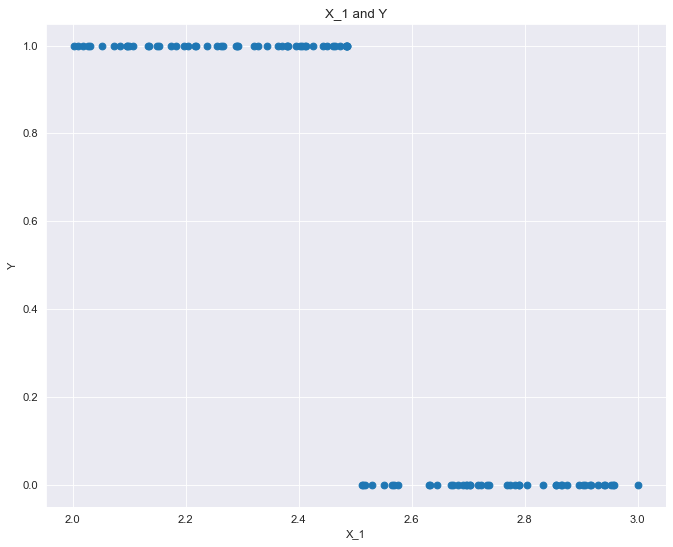

In [2216]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('X_1 and Y')
plt.xlabel('X_1')
plt.ylabel('Y')
plt.scatter(X_1, y)
plt.show()

In [2218]:
y_proba = sigmoid(X_b.dot(theta))

In [2219]:
log_loss_custom(y, y_proba)

array([1.73913343])

In [2221]:
log_loss(y, y_proba)

1.7391334313332174

In [2279]:
iterations = 100000
eta = .1
m = len(X_1)

theta = np.random.rand(2,1)

log_loss_track = []
log_loss_track_custom = []
track_theta = []
gradients_track = []

for iterations in range(iterations):
    log_loss_track.append(log_loss(y, sigmoid(X_b.dot(theta))))
    log_loss_track_custom.append(log_loss_custom(y, sigmoid(X_b.dot(theta))))
    gradients = (1/m) * X_b.T.dot(sigmoid(X_b.dot(theta))-y)
    gradients_track.append(gradients)
    theta = theta - eta * gradients
    track_theta.append(theta)

In [2280]:
gradients_track[-1]

array([[-1.26832238e-06],
       [ 4.84944756e-07]])

In [2281]:
log_loss(y, sigmoid(X_b.dot(theta)))

0.44078983747062356

In [2282]:
X_plot = np.linspace(2, 3, 1000)
X_plotb = np.c_[np.ones((1000,1)), X_plot]

In [2283]:
sig_plot = sigmoid(X_plotb.dot(theta))
sig_plot = [n[0] for n in sig_plot]

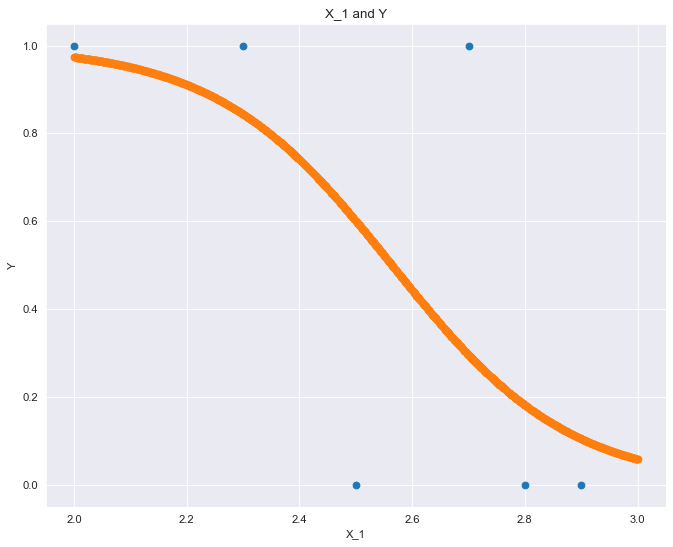

In [2284]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('X_1 and Y')
plt.xlabel('X_1')
plt.ylabel('Y')
plt.scatter(X_1, y)
plt.scatter(X_plot, sig_plot)
plt.show()

In [2285]:
theta1 = []
theta2 = []

for t in track_theta:
    theta1.append(float(t[0]))
    theta2.append(float(t[1]))

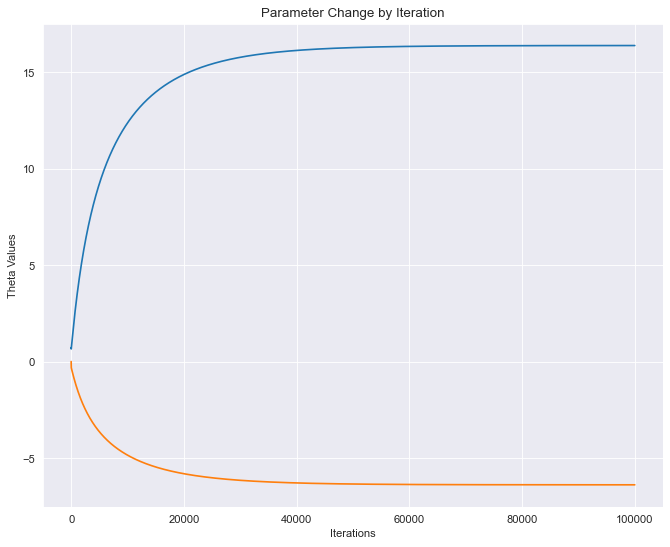

In [2286]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Parameter Change by Iteration')
plt.xlabel('Iterations')
plt.ylabel('Theta Values')
plt.plot(theta1)
plt.plot(theta2)
plt.show()

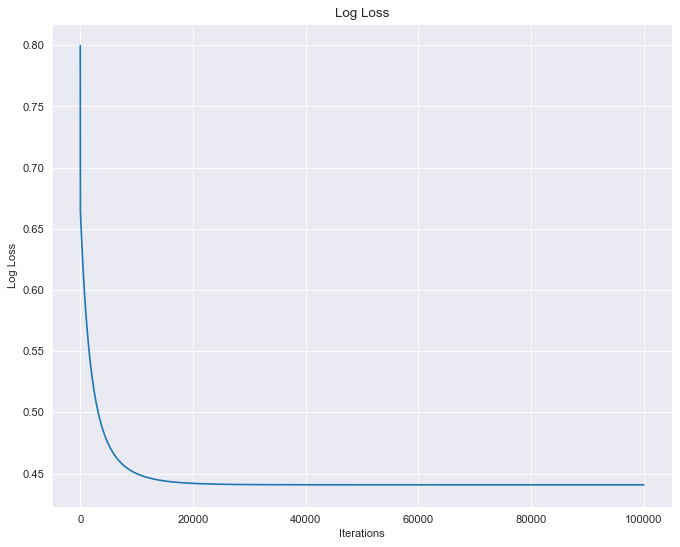

In [2287]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Log Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.plot(log_loss_track)
plt.show()

In [2288]:
min(log_loss_track)

0.44078983747080813

In [2289]:
min(log_loss_track_custom)

array([0.44078984])

In [2290]:
accuracy_score(y, sigmoid(X_b.dot(theta)).round())

0.6666666666666666

In [2291]:
theta

array([[16.37267182],
       [-6.38541584]])

In [2275]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression(max_iter=1000, tol = .0001, penalty = 'none')

In [2276]:
log_r.fit(X_1, y)

/Users/andrewleonard/opt/anaconda3/envs/pySceneDetect2/lib/python3.8/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, penalty='none')

In [2277]:
log_r.intercept_

array([16.37421164])

In [2278]:
log_r.coef_

array([[-6.38600418]])

In [2240]:
y_pred_function = log_r.predict_proba(X_1)
#y_pred_max = np.amax(y_pred_function, axis=1)
y_pred_max = y_pred_function[:, 1]
y_pred_max = y_pred_max.reshape(100,1)
log_loss_custom(y, y_pred_max) 

/var/folders/f4/6th45n6d6tx0fdgrzhzfsz4h0000gn/T/ipykernel_88975/1551281972.py:4: RuntimeWarning: divide by zero encountered in log
  log_loss = -sum((y*np.log(y_pred))+((1-y)*np.log(1-y_pred)))/m
/var/folders/f4/6th45n6d6tx0fdgrzhzfsz4h0000gn/T/ipykernel_88975/1551281972.py:4: RuntimeWarning: invalid value encountered in multiply
  log_loss = -sum((y*np.log(y_pred))+((1-y)*np.log(1-y_pred)))/m


array([nan])

In [2241]:
log_loss(y, y_pred_max) 

0.002825974193998955

In [2242]:
from sklearn.metrics import accuracy_score

In [2243]:
accuracy_score(y, log_r.predict(X_1))

1.0

In [2022]:
log_r.predict(X_1)

array([1., 1., 0., 1., 0., 1., 1., 0., 1., 1.])